# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


In [223]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import scipy
import scipy.io
from scipy import stats
import math

Plot a box plot and a histogram for each attribute to visualize the outliers in the data set:


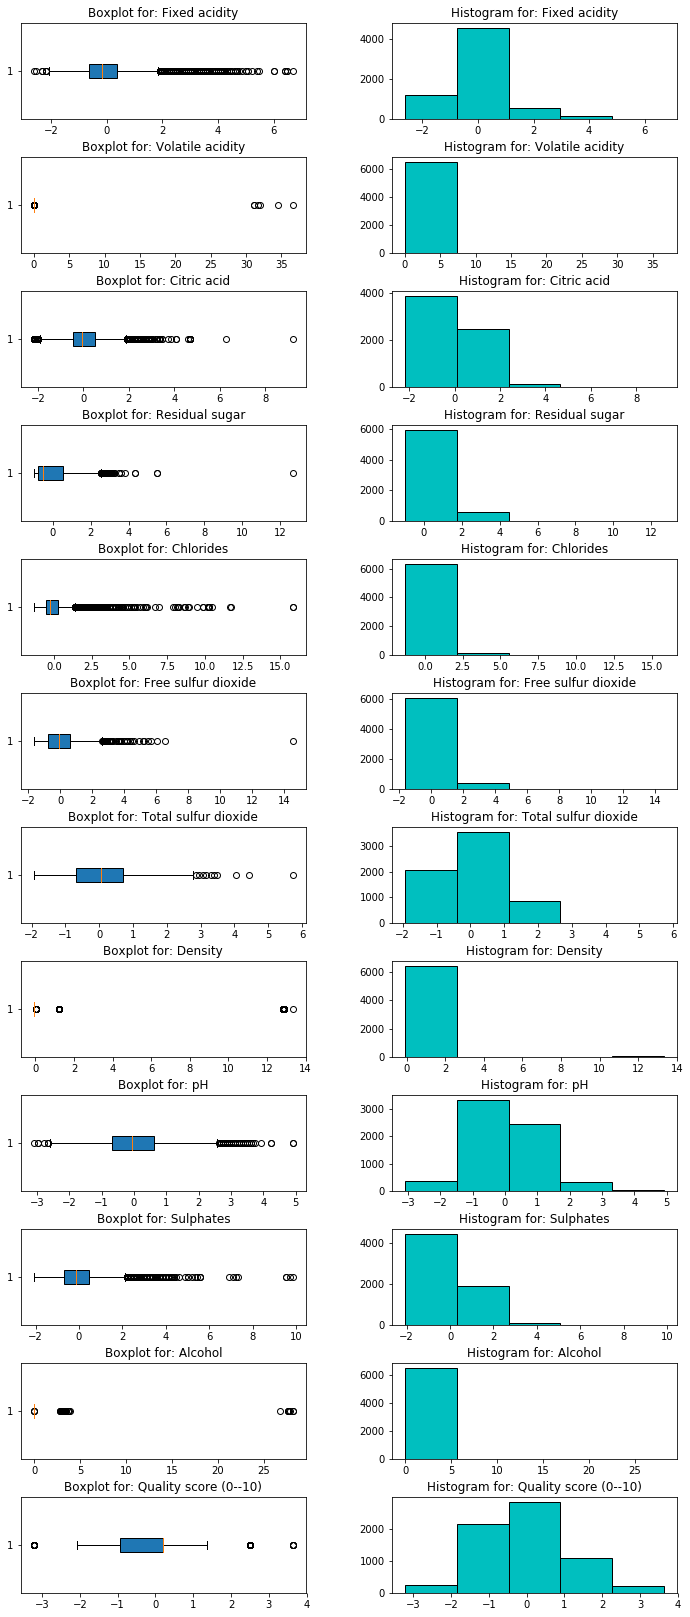

Plot new box plots and histograms for these attributes:


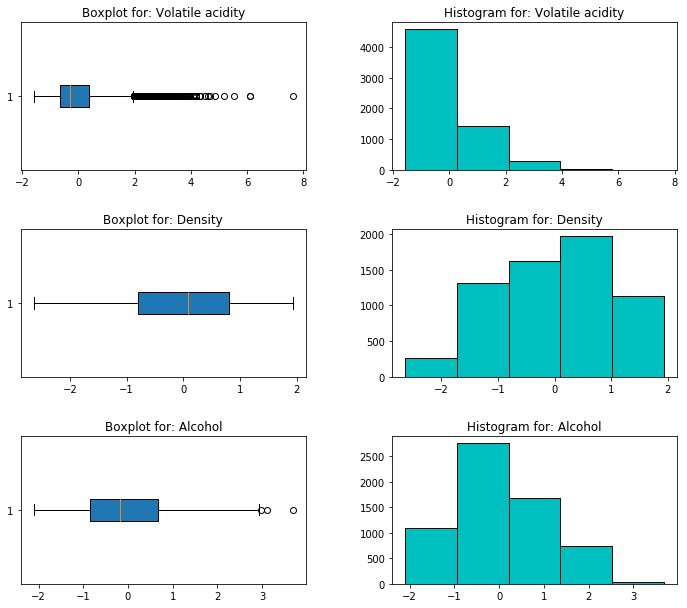

In [224]:
#Load the data into Python using the scipy.io.loadmat() function. 
data = scipy.io.loadmat("data/wine.mat")
#This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots. 
X = data['X']

attribute_names = [d[0] for d in data['attributeNames'][0]]
attribute_types = ['g/dm3','g/dm3', 'g/dm3', 'g/dm3', 'g/dm3', 'mg/dm3', 'mg/dm3', 'g/cm3','pH', 'g/dm3', '% vol', '0-10' ]
attribute_data = list(zip(attribute_names, attribute_types))


s_data = scipy.stats.zscore(X)

def show_box_plot(x,attribute_name, attribute_type):
    plt.boxplot(x,patch_artist=True, vert=False)
    plt.title('Box plot of '+attribute_name)
    plt.xlabel(attribute_type)
    plt.show()

def show_hist(x,attribute_name, attribute_type):
    values = x
    plt.hist(values,5, histtype='bar', align='mid', color='c', edgecolor='black',)
    plt.title('Histogram of '+attribute_name)
    plt.xlabel(attribute_type)
    plt.ylabel("Count")
    plt.show()
print("Plot a box plot and a histogram for each attribute to visualize the outliers in the data set:")
fig, axarr = plt.subplots(12,2)
for i in range(0,12):
    #data
    x = s_data[:,i]
    attribute_name = attribute_data[i][0]
    #graph
    axarr[i][0].boxplot(x,patch_artist=True, vert=False)
    axarr[i][0].set_title("Boxplot for: " + attribute_name)
    #plt.xlabel(attribute_type)
    axarr[i][1].hist(x,5, histtype='bar', align='mid', color='c', edgecolor='black',)
    axarr[i][1].set_title("Histogram for: "+attribute_name)
fig.subplots_adjust(left=0.08, right=1.6, bottom=0.05, top=5.5,
                   hspace=0.4, wspace=0.3)
plt.show()

#EXERCISE 2.3:
X_filtered = [sample for sample in X if (0.1 <= sample[7] <= 10) and (-10 <= sample[1] <= 20) and (0.5 <= sample[10] <= 100)]
s_filtered_data = scipy.stats.zscore(X_filtered)

print("Plot new box plots and histograms for these attributes:")
fig, axarr = plt.subplots(3,2)
counter = 0
for i in [1,7,10]:
    #data
    x = s_filtered_data[:,i]
    attribute_name = attribute_data[i][0]
    #graph
    axarr[counter][0].boxplot(x,patch_artist=True, vert=False)
    axarr[counter][0].set_title("Boxplot for: "+attribute_name)
    #plt.xlabel(attribute_type)
    axarr[counter][1].hist(x,5, histtype='bar', align='mid', color='c', edgecolor='black',)
    axarr[counter][1].set_title("Histogram for: "+attribute_name)
    counter += 1
fig.subplots_adjust(left=0.08, right=1.6, bottom=0.05, top=2,
                   hspace=0.4, wspace=0.3)
plt.show()
    
#subplot
plt.close('all')

----

We can see that, when we compare the new boxplots and histograms to the original ones, the data is less 'spread out' and there are less outliers in the boxplots. We can also see that the range of the x-axis has decreased a lot in the new graphs. 

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----
Because the mean is very sensitive to outliers, the ouliers will be very dominant in the result of standardizing the data. So it is very important to remove the outliers before standardizing.

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

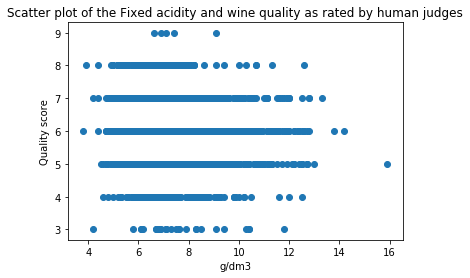

The correlation coeficient for Fixed acidity and wine quality is: -0.07668526520453652


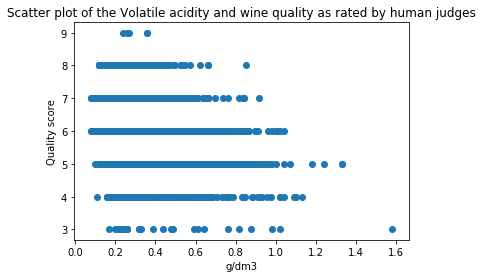

The correlation coeficient for Volatile acidity and wine quality is: -0.26230590578350776


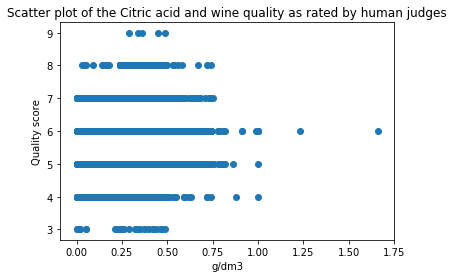

The correlation coeficient for Citric acid and wine quality is: 0.0890221181546118


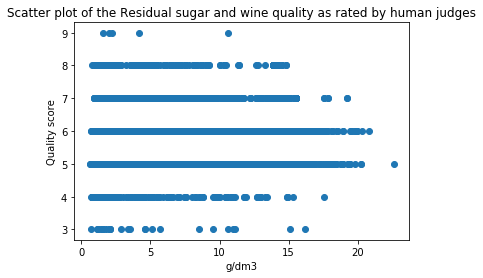

The correlation coeficient for Residual sugar and wine quality is: -0.03215392730963386


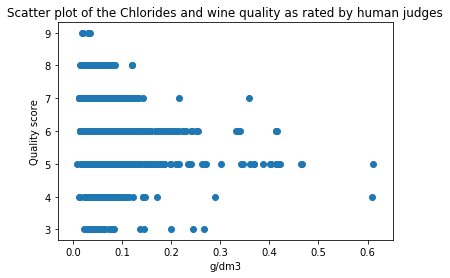

The correlation coeficient for Chlorides and wine quality is: -0.19914164479762572


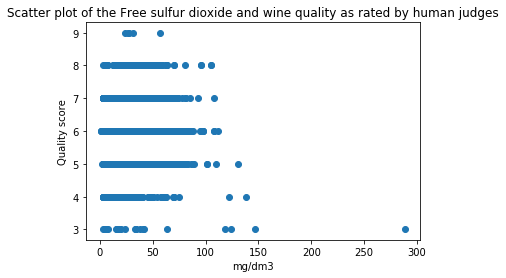

The correlation coeficient for Free sulfur dioxide and wine quality is: 0.05516006485585848


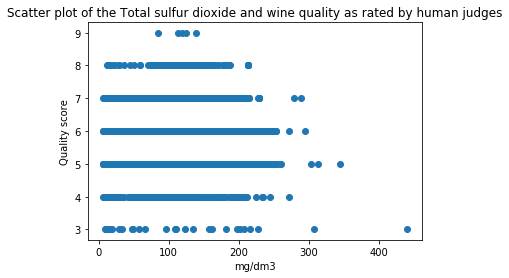

The correlation coeficient for Total sulfur dioxide and wine quality is: -0.03971034037910721


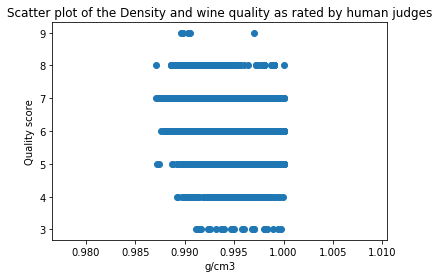

The correlation coeficient for Density and wine quality is: -0.3196176972872714


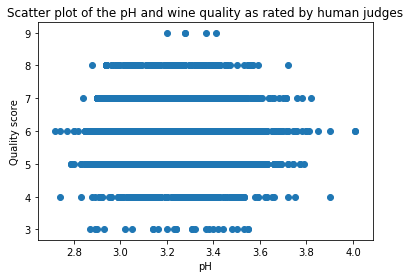

The correlation coeficient for pH and wine quality is: 0.02030807915814118


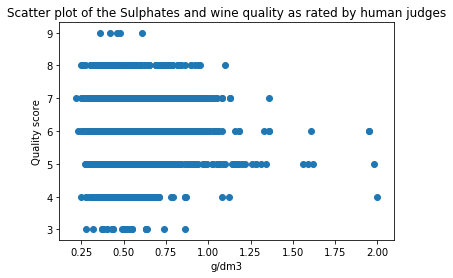

The correlation coeficient for Sulphates and wine quality is: 0.03798453783414721


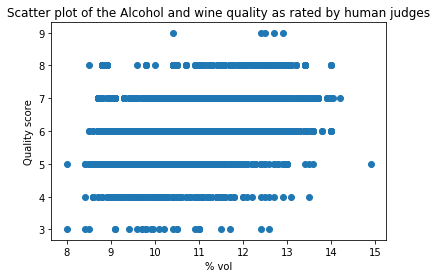

The correlation coeficient for Alcohol and wine quality is: 0.4495415274503276


In [227]:
X_filtered = np.array(X_filtered)
def show_scatters(X,attribute_name, attribute_type):
    human_judge= X_filtered[:,11]
    plt.scatter(X_filtered[:,i],human_judge)
    plt.title('Scatter plot of the '+ attribute_name + " and wine quality as rated by human judges")
    plt.xlabel(attribute_type)
    plt.ylabel("Quality score")
    plt.show()
    print("The correlation coeficient for " + attribute_name + " and wine quality is: " + str(scipy.stats.pearsonr(X_filtered[:,i],human_judge)[0]))

for i in range (0,11):    
    show_scatters(X_filtered, attribute_data[i][0], attribute_data[i][1])


----
- For fixed acidity the wine quality seems to be better when it is in the 6-10 range. However, since the correlation coefficient is rather small (-0.07668526520453652), fixed acidity does not seem to have much effect on the wine quality. 
- For volatile acidity the wine quality seems to be the best when it is in the 0.2 - 0.6 range, however the best wines are between 0.2 and 0.4 . Wines in the range from 0.8 onwards seem to get worse scores as the volatile acidity increases. This is supported by the correlation coeficient (-0.26230590578350776) which shows a small negative correlation.
- For the citric acid the best wines are in the range of 0.35 to 0.50 but the range of 0.0 to 0.75 seems to be a range in which good wines can be made. On the other hand, in the 0.35 to 0.50 range there are a lot of bad wines too, but no good wines have a citric acid grade higher than 1.00 . The correlation coeficient (0.0890221181546118) supports this since there is almost no correlation between citric acid and wine quality.  
- For residual sugar the best wines seem to be in the 0-5 range. There seems to be no range in which only bad wines are made. This is supported by the very small correlation coeficient (-0.03215392730963386). 
- For chlorides most good wines have a value inbetween 0.0 and 0.1. Wines with a higher chlorides value tend to get a lower quality score. The correlation coeficient (-0.19914164479762572) shows some negative correlation which supports our observations from the graph. 
- For free sulfur dioxide the optimal range seems to be between 0 and 50 while some reasonably high scoring wines still fall in the range between 0 and 100. However since most wines (high and low scoring ones) fall in this range, the free sulfur dioxide does not seem to have a large impact on the score of the wine. The correlation coeficient (0.05516006485585848) is rather small, and thus supports these findings. 
- For total sulfur dioxide wine quality seems best in the 100-200 range where a value in between 0-200 can still yield pretty good wines. Values above 200 most often have a mediocre or low score. However, as wines get from mediocre to low scores, the total sulfur dioxide amount decreases again, resulting in a small correlation coeficient (-0.03971034037910721) showing us that there is not much impact from the total sulfur dioxide on the quality score. 
- The density of all wines seems to be in between 0.985 and 1.0 . There seems to be no more specific range for high quality wines because the high quality wines are spread out over this density range. The same applies for low quality wines. However the correlation coeficient (-0.3196176972872714) shows us that the higher denisty wines score lower. This is possible, since it is not visible in the graph how many points are plotted for each quality score (points could be on top of eachother, giving one line much more points than another, while the graph does not show it). 
- For the pH the ideal values seem to be in between 3.2 and 3.5 for top wines, however some pretty high rated wines have scores in between 2.8 and 3.8 while low quality wines have scores in this range as well, thus the pH does not seem to be very related to wine quality. This is supported by the small correlation coeficient (0.02030807915814118).
- For the sulphates top wines have values in between 0.25 and 1.0.  Higher values tend to lead to medium quality wines, while low quality wines are in the 0.25-1.25 range, thus the amount of sulphates seems to be no large factor in deciding the quality score because the range for low quality and high quality wines is mostly the same. The correlation coeficient (0.03798453783414721) supports these views because it indicates that a higher amount of sulphates contributes to a marginally higher quality score. 
- The alcohol percentage seems to lead to higher scores as it gets higher. Low quality wines are mostly in the 8-13 range where most higher quality wines tend to be in the range between 10 and 14. Thus a higher alcohol percentage seems to lead to a higher quality rating. These findings are supported by the correlation coeficient (0.4495415274503276) which shows a noticible increase in quality score as the alcohol percentage increases. 

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


Visualize the first 10 digits as an image


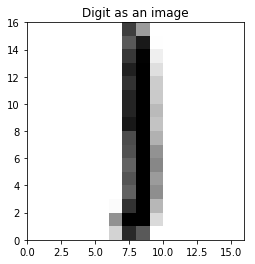

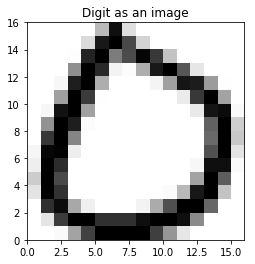

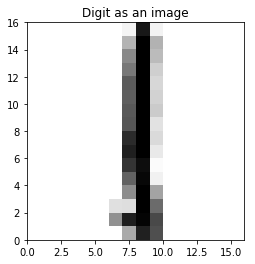

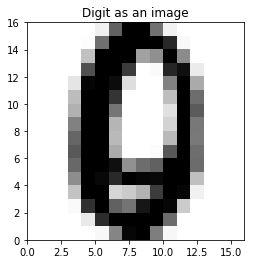

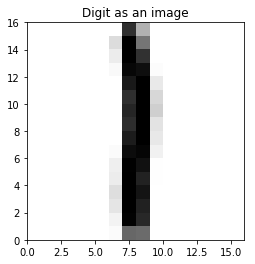

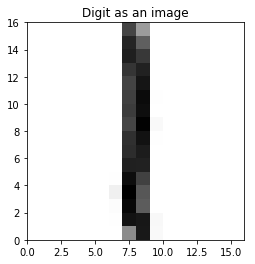

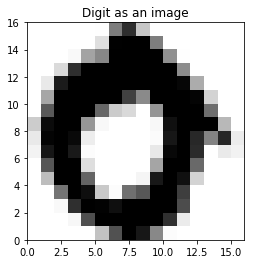

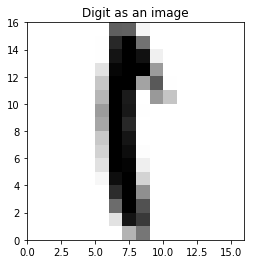

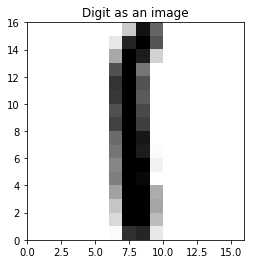

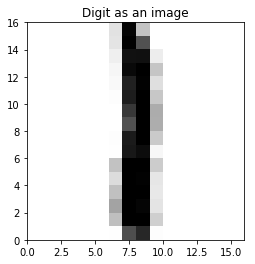

Visualize the first 10 digits as images for the reconstructed data:


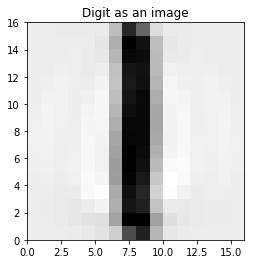

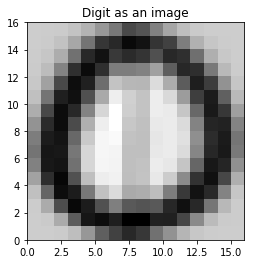

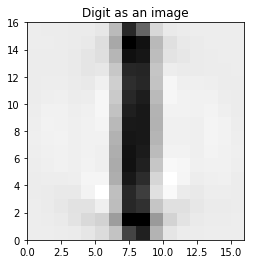

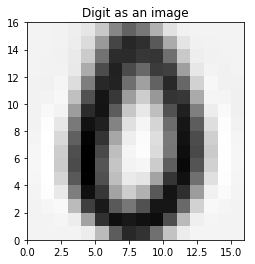

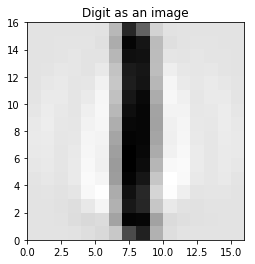

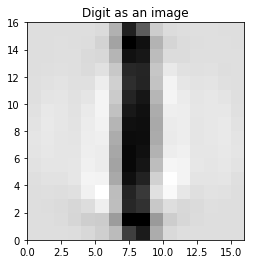

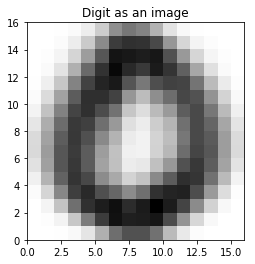

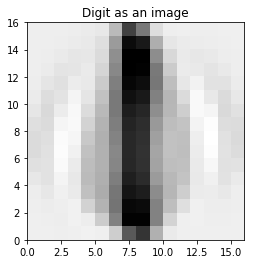

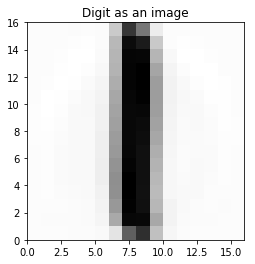

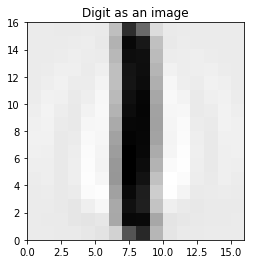

Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4:


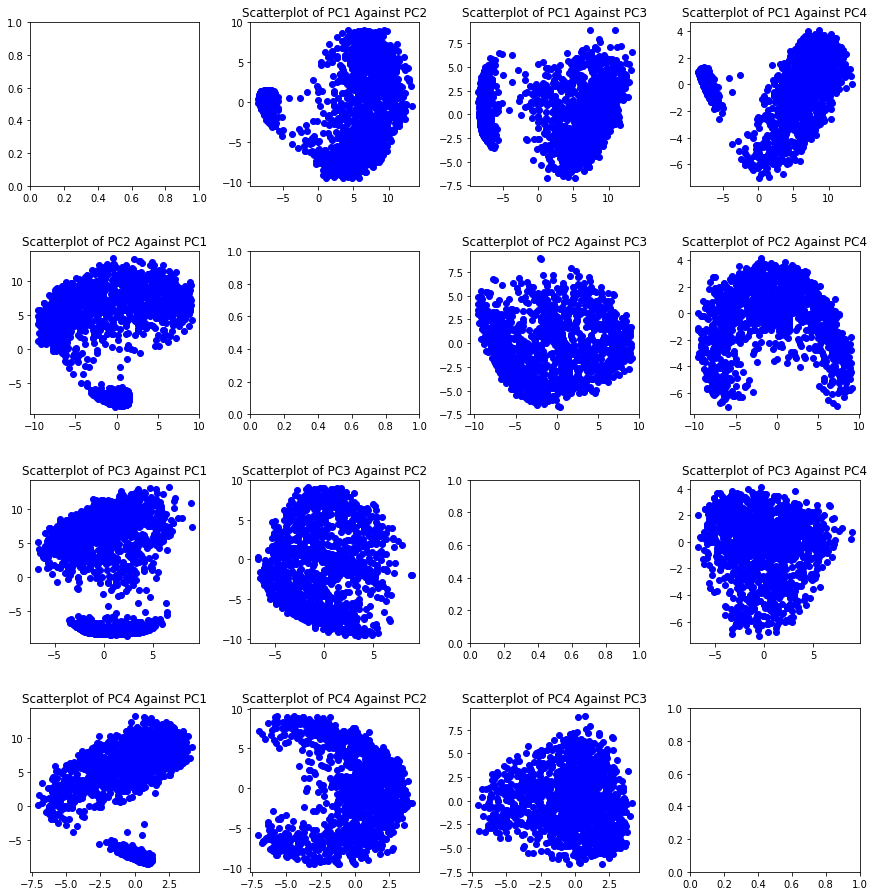

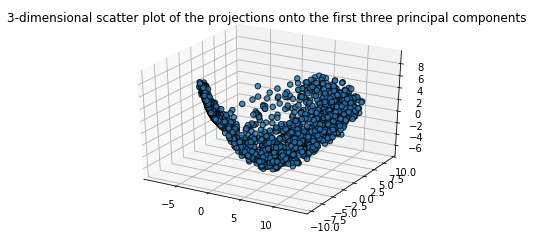

In [228]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape
import numpy as np

#EXERCISE 2.1: Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']

#EXERCISE: 2.2: filter the traindata
one_or_two = traindata[:,0] < 2
traindata_filtered = traindata[one_or_two]

X = traindata_filtered[:,1:]
y = traindata_filtered[:,0]

#EXERCISE: 2.3: Visualize the first 10 digits as an image
print("Visualize the first 10 digits as an image")
def show_image(i, X):
    plt.subplot(1,1,1);
    I = reshape(X[i,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image');
    plt.show()
for i in range(0,10):
    show_image(i, X)
    
#Next, compute the principal components (PCA) of the data matrix
def PCA(matrix):
    mean = matrix.mean(axis=0)
    Y = matrix - mean
    U,s,V = np.linalg.svd(Y)
    V = V.T
    Z = np.dot(Y,V[:,:4])
    return (np.dot(Y,V[:,:4]),V, mean)
Z, V, mean = PCA(X)

#NOG NAAR KIJKEN: Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.


#EXERCISE 2.4: Reconstruct the initial data using PC1-PC4 into a new matrix called W
W = np.dot(Z,V[:,:4].T) + mean
print("Visualize the first 10 digits as images for the reconstructed data:")
for i in range(0,10):
    show_image(i, W)


#EXERCISE 2.5: 
print("Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4:")
PCs = [Z[:,0],Z[:,1],Z[:,2],Z[:,3]]

fig, axarr = plt.subplots(4,4)

for i in range(0,4):
    for j in range(0,4):
        if(i != j):
            axarr[i, j].plot(PCs[i], PCs[j], 'bo')
            axarr[i, j].set_title('Scatterplot of PC'+ str(i+1) +' Against PC' + str(j+1))

fig.subplots_adjust(left=0.08, right=2, bottom=0.05, top=3,
                   hspace=0.4, wspace=0.3)
plt.show()

#EXERCISE 2.6: 
from mpl_toolkits.mplot3d import Axes3D
PC1 = Z[:,0]
PC2 = Z[:,1]
PC3 = Z[:,2]


data = (PC1,PC2,PC3)
 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
 

ax.scatter(PC1, PC2, PC3, alpha=0.8, edgecolors='none', s=30)


plt.title('3-dimensional scatter plot of the projections onto the first three principal components')

    
plt.show()
        




----
After applying PCA, we see that the images as a whole have become less defined. 
The main shape is still visible, but the edges are more blury than before. 
We also see that the background has become darker (and the letters seem to have become a slight bit lighter as well) due to the loss of information which resulted from the PCA.
However since the main shape is still visible there is clearly enough information left to form a usable picture. 

----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [229]:
population = np.array([2,3,6,8,11,18])
mean = np.ndarray.mean(population)
sd = np.ndarray.std(population)
print("mean", mean)
print("standard deviation", sd)


mean 8.0
standard deviation 5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [230]:
import itertools

def possible_samples(number):
    combinations = list(itertools.combinations(population,number))
    means = [np.ndarray.mean(x) for x in np.array(combinations)]
    data = list(zip(combinations, means))

    for element in data:
        print("\nPossible sample: ", element[0],  " and its mean: ", element[1] )
    return means
print("**List all possible samples of two aliens without replacement, and find each mean:**")
n_2_means = possible_samples(2)
print("\n**Do the same with samples of four aliens:**")
n_4_means = possible_samples(4)   


**List all possible samples of two aliens without replacement, and find each mean:**

Possible sample:  (2, 3)  and its mean:  2.5

Possible sample:  (2, 6)  and its mean:  4.0

Possible sample:  (2, 8)  and its mean:  5.0

Possible sample:  (2, 11)  and its mean:  6.5

Possible sample:  (2, 18)  and its mean:  10.0

Possible sample:  (3, 6)  and its mean:  4.5

Possible sample:  (3, 8)  and its mean:  5.5

Possible sample:  (3, 11)  and its mean:  7.0

Possible sample:  (3, 18)  and its mean:  10.5

Possible sample:  (6, 8)  and its mean:  7.0

Possible sample:  (6, 11)  and its mean:  8.5

Possible sample:  (6, 18)  and its mean:  12.0

Possible sample:  (8, 11)  and its mean:  9.5

Possible sample:  (8, 18)  and its mean:  13.0

Possible sample:  (11, 18)  and its mean:  14.5

**Do the same with samples of four aliens:**

Possible sample:  (2, 3, 6, 8)  and its mean:  4.75

Possible sample:  (2, 3, 6, 11)  and its mean:  5.5

Possible sample:  (2, 3, 6, 18)  and its mean:  7.25

Pos

> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [231]:
m_x_2 = np.ndarray.mean(np.array(n_2_means))
m_x_4 = np.ndarray.mean(np.array(n_4_means))

sd_x_2 = np.ndarray.std(np.array(n_2_means))
sd_x_4 = np.ndarray.std(np.array(n_4_means))

print("**for N=2**\nThe mean of all sample means is: ", m_x_2, "\nand the deviation of all sample means is: ",sd_x_2)
print("**for N=4**\nThe mean of all sample means is: ", m_x_4, "\nand the deviation of all sample means is: ",sd_x_4)

**for N=2**
The mean of all sample means is:  8.0 
and the deviation of all sample means is:  3.40587727318528
**for N=4**
The mean of all sample means is:  8.0 
and the deviation of all sample means is:  1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

In [233]:
print("i.")
print("The population mean is: ", mean)
print("The sample mean for N=2 is: ", m_x_2)
print("The sample mean for N=4 is: ", m_x_4)
mean_of_sample_means= m_x_2 + m_x_4
mean_of_sample_means = mean_of_sample_means/2
print("The mean of both sample means is: ", mean_of_sample_means)
print("We see that all four means are the same")

print("\n ii.")
sqrt_2=math.sqrt(2)
sd_div_sqrt=sd/sqrt_2 
print("The normal formula for standard deviation divided by \n the square root"
      + " of the sample size gives us: ", sd_div_sqrt)
sqrt_extended_2=math.sqrt(4/5)
extended_formula=sd_div_sqrt*sqrt_extended_2
print("The extended formula for standard deviation divided by \n the square root"
      + " of the sample size gives us: ", extended_formula)
print("The standard deviation for the samples with sample size 2 is:", sd_x_2)


sqrt_4=math.sqrt(4)
sd_div_sqrt=sd/sqrt_4 
print("\n The normal formula for standard deviation divided by \n the square root"
      + " of the sample size gives us: ", sd_div_sqrt)
sqrt_extended_4=math.sqrt(2/5)
extended_formula=sd_div_sqrt*sqrt_extended_4
print("The extended formula for standard deviation divided by \n the square root"
      + " of the sample size gives us: ", extended_formula)
print("The standard deviation for the samples with sample size 4 is:", sd_x_4)

print("\n When we compare the standard deviation divided by the square root of the sample size \n"  
      + "with the standard deviation of both sample means we see that they are the same" 
      + "for both sample sizes when we use the extended \n formula." 
      + " We also see that the normal formula does approximate the standard deviation of the samples."
     + "This means that the central limit theorem holds.")

i.
The population mean is:  8.0
The sample mean for N=2 is:  8.0
The sample mean for N=4 is:  8.0
The mean of both sample means is:  8.0
We see that all four means are the same

 ii.
The normal formula for standard deviation divided by 
 the square root of the sample size gives us:  3.807886552931954
The extended formula for standard deviation divided by 
 the square root of the sample size gives us:  3.40587727318528
The standard deviation for the samples with sample size 2 is: 3.40587727318528

 The normal formula for standard deviation divided by 
 the square root of the sample size gives us:  2.692582403567252
The extended formula for standard deviation divided by 
 the square root of the sample size gives us:  1.70293863659264
The standard deviation for the samples with sample size 4 is: 1.70293863659264

 When we compare the standard deviation divided by the square root of the sample size 
with the standard deviation of both sample means we see that they are the samefor both samp

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

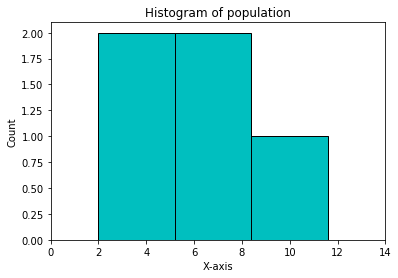

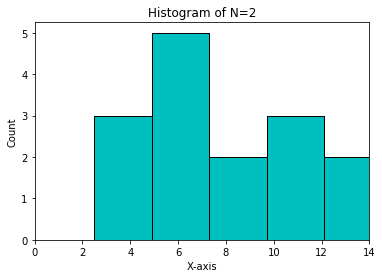

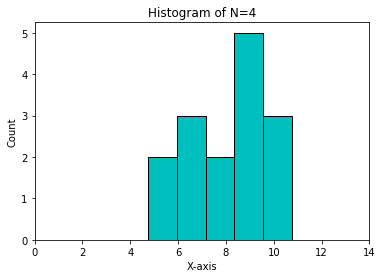

In [234]:
plt.hist(population,5, histtype='bar', align='mid', color='c', edgecolor='black',)
plt.title('Histogram of population')
plt.ylabel("Count")
plt.xlabel("X-axis")
plt.xlim(0,14)
plt.show()


plt.hist(n_2_means,5, histtype='bar', align='mid', color='c', edgecolor='black',)
plt.title('Histogram of N=2')
plt.ylabel("Count")
plt.xlabel("X-axis")
plt.xlim(0,14)
plt.show()

plt.hist(n_4_means,5, histtype='bar', align='mid', color='c', edgecolor='black',)
plt.title('Histogram of N=4')
plt.ylabel("Count")
plt.xlabel("X-axis")
plt.xlim(0,14)

plt.show()

----
When the sample size increases, the distribution of the means of the samples starts showing more and more samples in the middle of the distribution.
This is confirmed by the standard deviation decreasing which means that there is less distance between the samples in the distribution.

----